In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/creditcard 2.csv')

In [5]:
df_backup = df.copy()

# Analyzing the data,
# EDA

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [ ]:
df.isnull().values.any()

False

# Checking the distribution of the classes

In [ ]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [ ]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

 There is only 0.17% frauds, hence the class is imbalance.

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

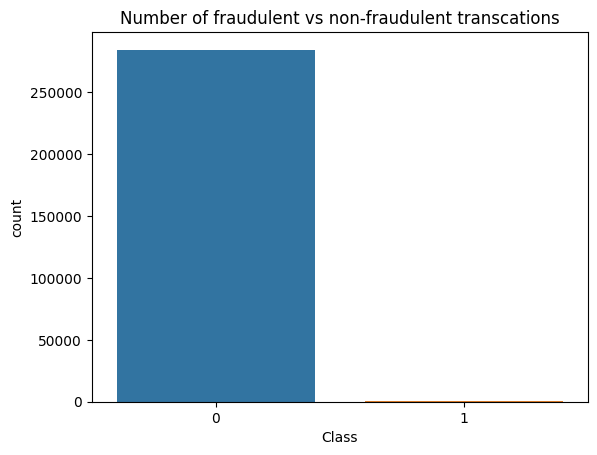

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

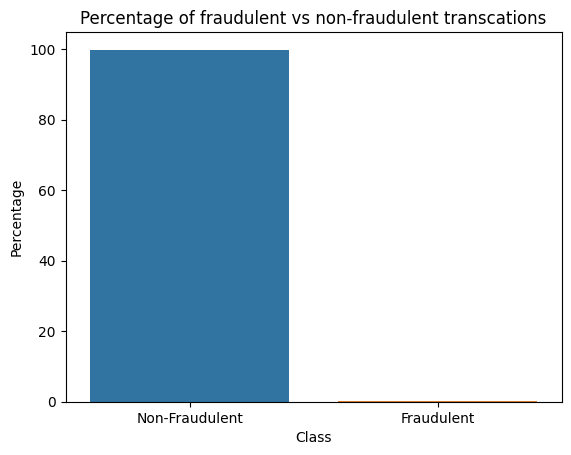

In [ ]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class', y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

# Distribution of classes with time

In [ ]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

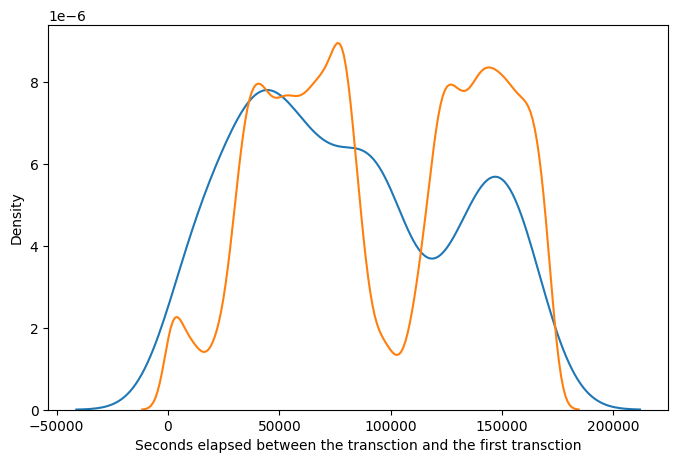

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

since there is not any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time, we can drop the Time column.

# Distribution of classes with Amount

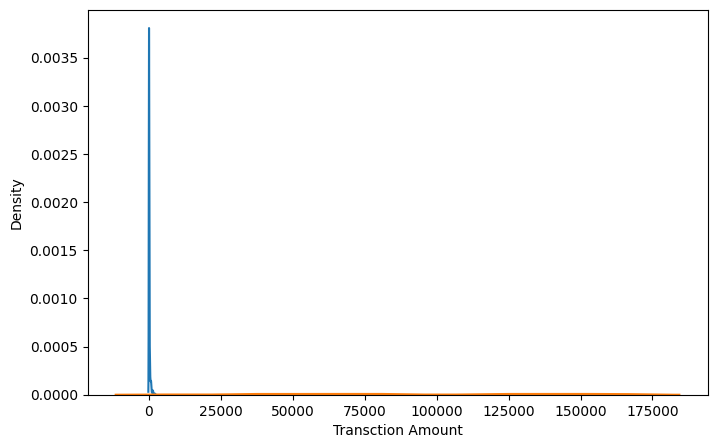

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

It can be seen that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

# Train-Test split, Oversampling and Feature scaling

In [9]:
# Declaring feature vector and target variable
X = df.drop(labels=['Class', 'Time'], axis=1)
y = df.loc[:,'Class']

In [10]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

The only feature that needs to be scaled is the Amount column as all other columns are already scaled by the PCA transformation.

In [11]:
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [12]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


We don't fit scaler on the test set. We only transform the test set.

We do this to prevent data leakage.

In [13]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


## Classification, using Logistic regression

In [20]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [15]:
lr_predict = lr.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, lr_predict)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.91%


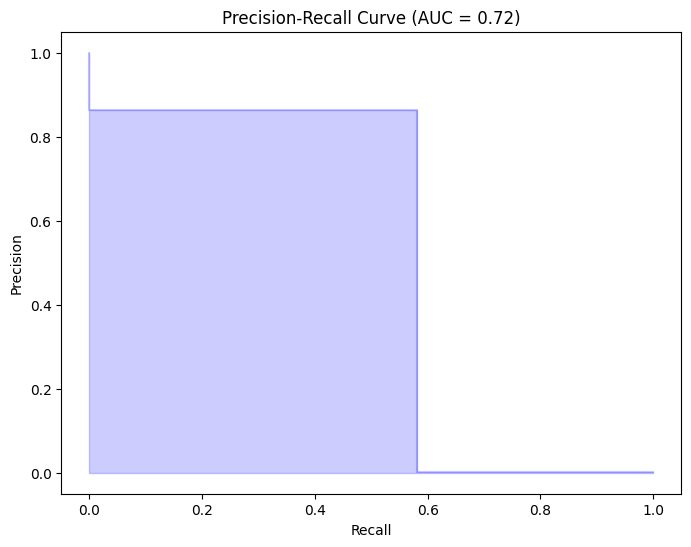

In [17]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, lr_predict)
auc_score = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.show()

# Oversampling and Logisitic Regression

In [18]:
# Use Synthetic Minority Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy='minority')
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [19]:
import plotly.express as px
under_sample_df = pd.concat([X_train_over, y_train_over], axis=1)
labels=["Non Fraud","Fraud"]
fraud_or_not = under_sample_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=under_sample_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","lightgreen"]
             ,title="Fraud vs Non Fraud transactions")
fig.show()

In [22]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train_over, y_train_over)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [23]:
lr_predict = lr.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, lr_predict)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.42%


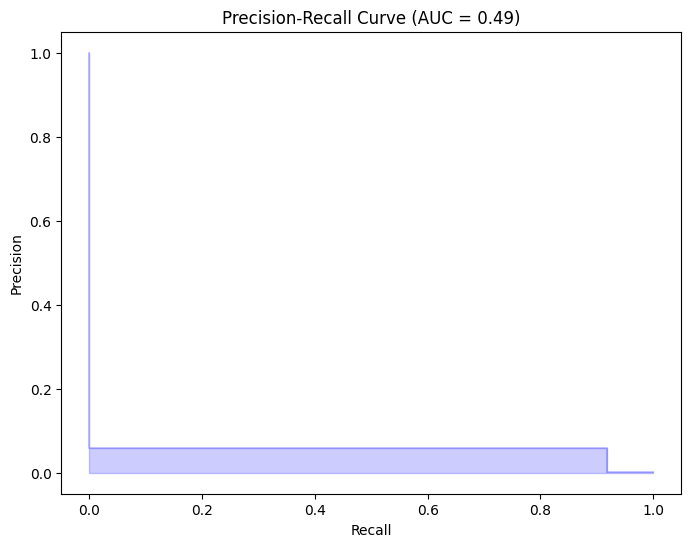

In [25]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, lr_predict)
auc_score = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.show()

# Clustering, using K-means.

finding the best number of clusters using the elbow method.

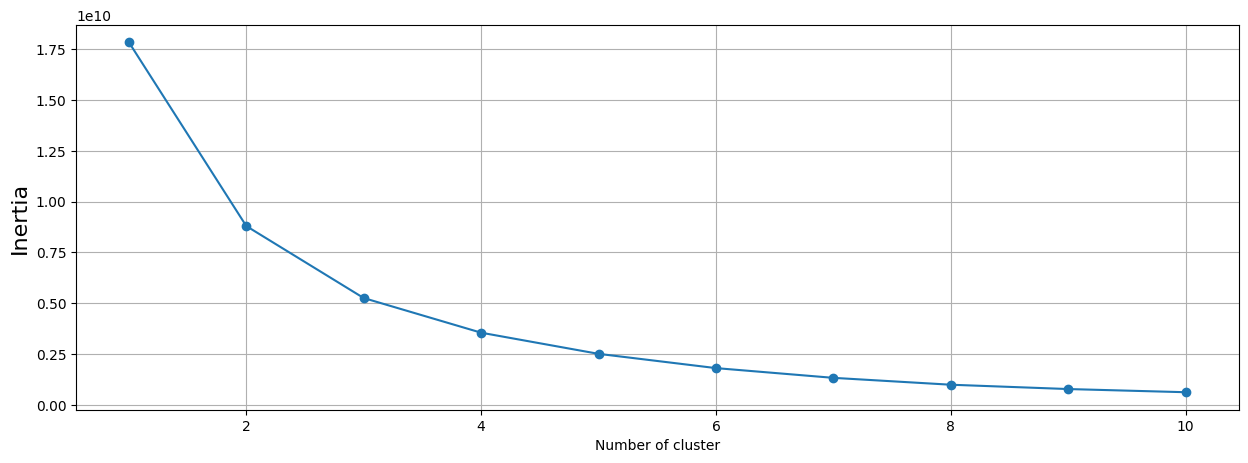

In [97]:
means = []
interias = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27','V28', 'Amount']])

  means.append(k)
  interias.append(kmeans.inertia_)

fig = plt.subplots(figsize=(15, 5))
plt.plot(means, interias, 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia", fontsize=16)
plt.grid(True)
plt.show();


performing the k-means algorithm for this data with the optimal number of clusters (2),

20% of the data : test

80% of the data : train

In [26]:
# Declaring feature vector and target variable
X = df.drop(labels=['Class', 'Time'], axis=1)
y = df.loc[:,'Class']

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [28]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [29]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [30]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [31]:
cluster1 = X[kmeans.labels_==0]
cluster2 = X[kmeans.labels_==1]

In [32]:
cluster1.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,...,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000,150061.000000
mean,-1.307374,0.489565,0.430560,-0.238250,0.275478,0.029628,0.255078,-0.001647,-0.178647,-0.135558,...,0.013774,0.020963,0.066126,0.006385,-0.000973,-0.109648,-0.009246,0.014523,0.001871,-0.043255
std,1.813723,1.932486,1.648385,1.547329,1.614715,1.471473,1.518920,1.602695,1.155087,1.326379,...,0.941631,0.969713,0.769151,0.802971,0.610624,0.586653,0.469764,0.549163,0.450360,0.990033
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.824849,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229
25%,-1.546131,0.015788,-0.336184,-1.129381,-0.376206,-0.793298,-0.225364,-0.216047,-0.781944,-0.772542,...,-0.198498,-0.235217,-0.507381,-0.209112,-0.356860,-0.432327,-0.329638,-0.123458,-0.097266,-0.333279
50%,-0.856302,0.735935,0.713454,-0.384848,0.246920,-0.254685,0.391335,0.103173,-0.255215,-0.308460,...,0.002174,-0.011259,0.082106,-0.032626,0.038989,-0.138905,-0.029594,0.054018,0.051200,-0.281064
75%,-0.423090,1.163047,1.465294,0.569838,0.926703,0.504922,0.866624,0.516543,0.342153,0.297283,...,0.205875,0.219109,0.620709,0.142096,0.441735,0.226330,0.239885,0.230245,0.143829,-0.093354
max,1.448939,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243


In [33]:
cluster2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,...,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000,134746.000000
mean,1.455968,-0.545208,-0.479497,0.265329,-0.306788,-0.032995,-0.284070,0.001834,0.198952,0.150966,...,-0.015340,-0.023346,-0.073641,-0.007111,0.001083,0.122110,0.010297,-0.016173,-0.002084,0.048172
std,0.649774,1.020026,1.181948,1.198861,0.971815,1.156826,0.715721,0.393086,0.995078,0.709546,...,0.517989,0.303512,0.666349,0.325704,0.600056,0.403447,0.495536,0.089457,0.066406,1.008811
min,-14.641710,-28.554825,-16.233798,-3.916031,-40.427726,-4.153568,-11.199975,-12.454357,-5.902828,-13.691315,...,-10.347328,-5.120828,-5.221075,-17.018295,-2.836627,-3.741618,-1.773575,-2.710252,-2.713136,-0.353229
25%,1.143721,-0.929962,-1.344165,-0.576035,-0.916386,-0.743330,-0.712703,-0.204232,-0.377802,-0.251743,...,-0.218487,-0.220880,-0.588834,-0.116528,-0.352201,-0.177135,-0.325337,-0.056223,-0.042787,-0.324443
50%,1.362466,-0.352027,-0.316130,0.317853,-0.362383,-0.291407,-0.248698,-0.029100,0.192829,0.039979,...,-0.110850,-0.042399,-0.047276,0.006945,0.043221,0.184949,-0.071083,-0.013401,0.000650,-0.239524
75%,1.986043,0.042760,0.434362,0.893505,0.213619,0.297894,0.131159,0.172609,0.820601,0.611532,...,0.040086,0.150832,0.414408,0.151550,0.437418,0.412944,0.241962,0.028408,0.024859,0.006558
max,2.454930,7.016714,2.824841,10.343228,5.998306,23.917837,44.054461,4.014722,5.450566,4.048655,...,17.819507,5.788207,2.527417,7.040028,4.014444,2.520869,3.122747,4.753930,1.422017,40.425011


Number of class 0 in cluster 1 :  149703
Number of class 1 in cluster 1 :  358
Number of class 0 in cluster 2 :  134612
Number of class 1 in cluster 2 :  134
--------------------------------------------------
cluster 1 = Non-Fraud & cluster 2 = Fraud :
Confusion Matrix : 


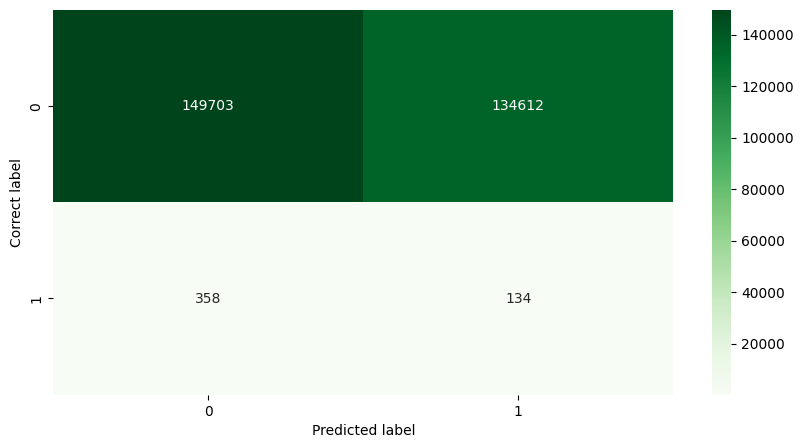

Accuracy Score :  0.53
Recall Score :  0.27
Precision Score :  0.0
F1 Score :  0.0
AUC Score :  0.4
--------------------------------------------------
cluster 1 = Fraud & cluster 2 = Non-Fraud:
Confusion Matrix : 


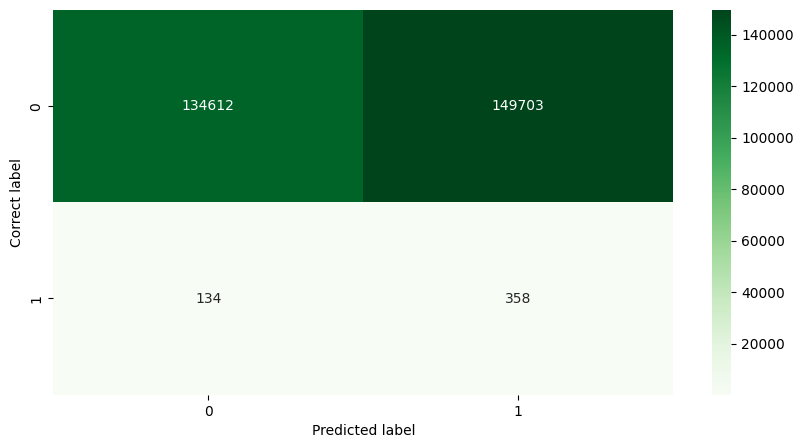

Accuracy Score :  0.47
Recall Score :  0.73
Precision Score :  0.0
F1 Score :  0.0
AUC Score :  0.6


In [38]:
C0_in_CL1 = len(y[kmeans.labels_==0][y[kmeans.labels_==0]==0])
C1_in_CL1 = len(y[kmeans.labels_==0][y[kmeans.labels_==0]==1])
C0_in_CL2 = len(y[kmeans.labels_==1][y[kmeans.labels_==1]==0])
C1_in_CL2 = len(y[kmeans.labels_==1][y[kmeans.labels_==1]==1])

print('Number of class 0 in cluster 1 : ', C0_in_CL1)
print('Number of class 1 in cluster 1 : ', C1_in_CL1)
print('Number of class 0 in cluster 2 : ', C0_in_CL2)
print('Number of class 1 in cluster 2 : ', C1_in_CL2)



print('-'*50)
print('cluster 1 = Non-Fraud & cluster 2 = Fraud :')
print('Confusion Matrix : ')
Tn = C0_in_CL1
Tp = C1_in_CL2
Fp = C0_in_CL2
Fn = C1_in_CL1

plt.figure(figsize = (10,5))
sns.heatmap([[Tn, Fp], [Fn, Tp]], annot=True, fmt='d', cmap="Greens");
plt.ylabel('Correct label');
plt.xlabel('Predicted label');
plt.show()

accuracy = round((Tn+Tp)/(Tn+Tp+Fp+Fn),2)
print('Accuracy Score : ', accuracy)
recall = round(Tp/(Tp+Fn),2)
print('Recall Score : ', recall)
precision = round(Tp/(Tp+Fp),2)
print('Precision Score : ', precision)
f1 = round(2*(precision*recall)/(precision+recall),2)
print('F1 Score : ', f1)
auc = round((Tp/(Tp+Fn) + Tn/(Tn+Fp))/2,2)
print('AUC Score : ', auc)


print('-'*50)
print('cluster 1 = Fraud & cluster 2 = Non-Fraud:')
# Confusion Matrix
Tn = C0_in_CL2
Tp = C1_in_CL1
Fp = C0_in_CL1
Fn = C1_in_CL2

print('Confusion Matrix : ')
plt.figure(figsize = (10,5))
sns.heatmap([[Tn, Fp], [Fn, Tp]], annot=True, fmt='d', cmap="Greens");
plt.ylabel('Correct label');
plt.xlabel('Predicted label');
plt.show()

accuracyN = round((Tn+Tp)/(Tn+Tp+Fp+Fn),2)
print('Accuracy Score : ', accuracyN)
recallN = round(Tp/(Tp+Fn),2)
print('Recall Score : ', recallN)
precisionN = round(Tp/(Tp+Fp),2)
print('Precision Score : ', precisionN)
f1N = round(2*(precisionN*recallN)/(precisionN+recallN),2)
print('F1 Score : ', f1N)
aucN = round((Tp/(Tp+Fn) + Tn/(Tn+Fp))/2,2)
print('AUC Score : ', aucN)

auc = max(auc, aucN)
accuracy = max(accuracy, accuracyN)